In [25]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt


# Problem 1

### Solution a, c

Setting up the dataset

In [32]:
y = [0, 5, 10]
theta = [0.2, 0.5]
mu_prior = 10

Creating model for all combination

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.
Sampling: [y]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.
Sampling: [y]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.
Sampling: [y]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.
Sampling: [y]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.
Sampling: [y]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]
Sampling 4 chains for 1_000 tune and 3_000 draw iteratio

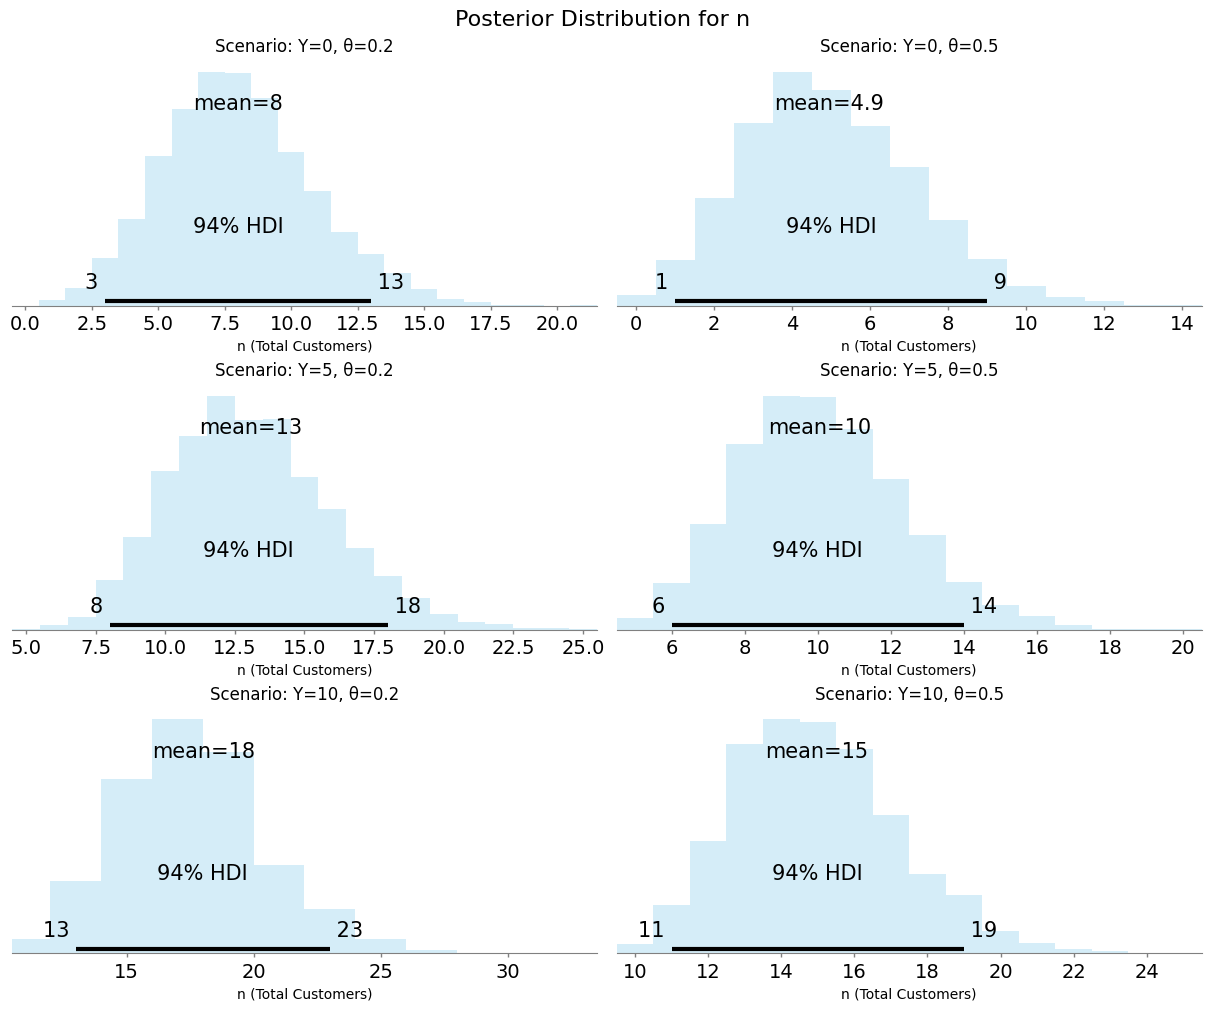

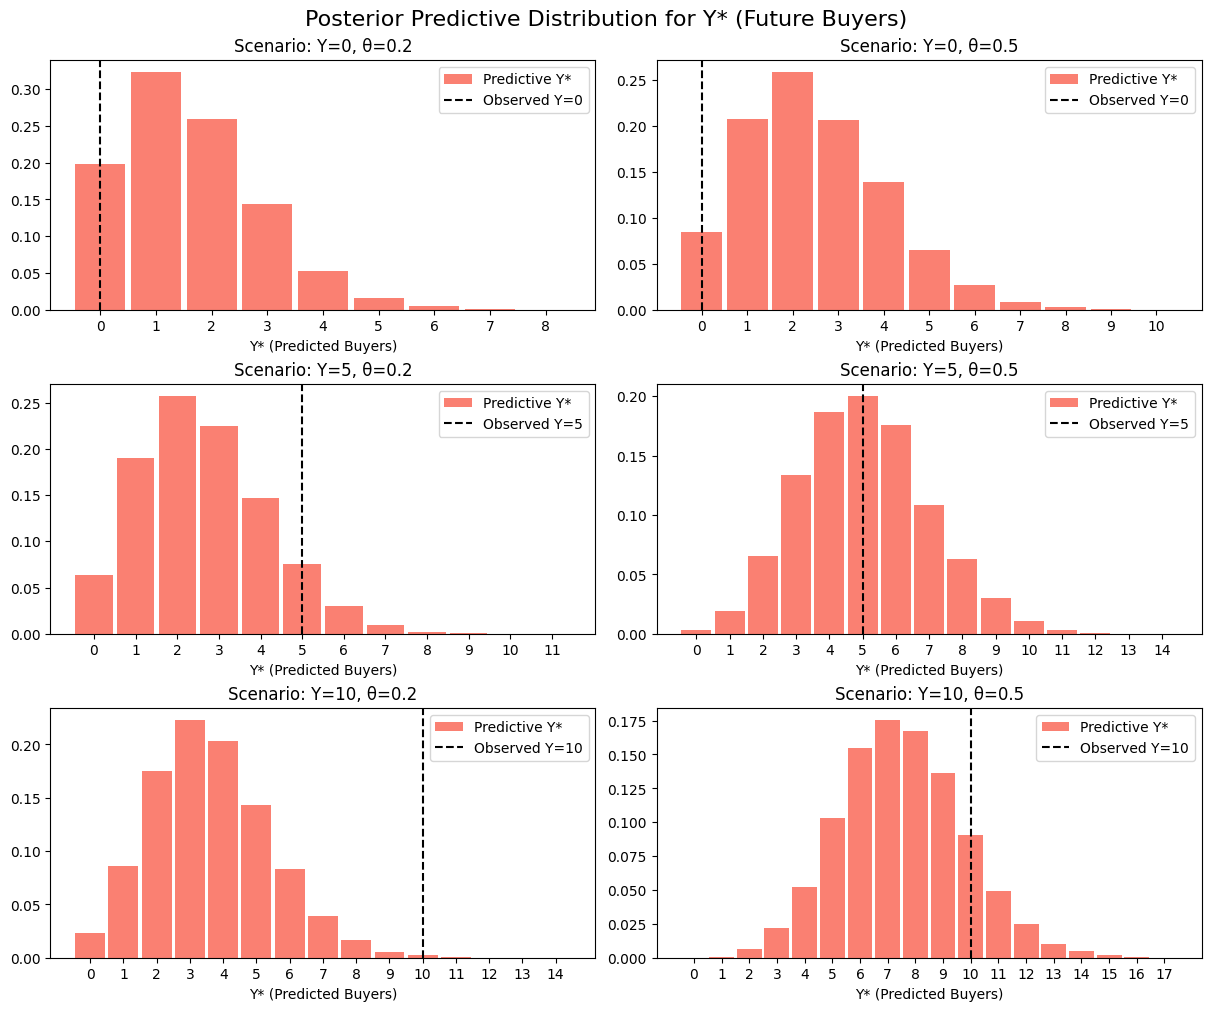

In [33]:


# Plotting each model for posterior n
fig_n, axes_n = plt.subplots(len(y), len(theta), figsize=(12, 10), constrained_layout=True)
fig_n.suptitle('Posterior Distribution for n ', fontsize=16)

# Plotting for predictive Y*
fig_ppc, axes_ppc = plt.subplots(len(y), len(theta), figsize=(12, 10), constrained_layout=True)
fig_ppc.suptitle('Posterior Predictive Distribution for Y* (Future Buyers)', fontsize=16)


for i, y_observ in enumerate(y):
    for j, theta_prior in enumerate(theta):

        with pm.Model() as model:
            n = pm.Poisson('n', mu=mu_prior, initval=max(10, y_observ + 5))
            y = pm.Binomial('y', n=n, p=theta_prior, observed=y_observ)
            idata = pm.sample(3000, tune=1000, return_inferencedata=True, progressbar=False)
            pm.sample_posterior_predictive(idata, extend_inferencedata=True, progressbar=False)

        # Plotting for posterior n
        ax_n = axes_n[i, j]
        az.plot_posterior(idata, var_names=["n"], ax=ax_n, color="skyblue")
        ax_n.set_title(f"Scenario: Y={y_observ}, θ={theta_prior}")
        ax_n.set_xlabel("n (Total Customers)")

        #Plotting for prediction Y*
        ax_ppc = axes_ppc[i, j]
        # We plot the distribution of generated samples (y observations)
        az.plot_dist(idata.posterior_predictive["y"], ax=ax_ppc, color="salmon", label="Predictive Y*")

        #Observed data for Y (As reference)
        ax_ppc.axvline(y_observ, color="black", linestyle="--", label=f"Observed Y={y_observ}")
        ax_ppc.set_title(f"Scenario: Y={y_observ}, θ={theta_prior}")
        ax_ppc.set_xlabel("Y* (Predicted Buyers)")
        ax_ppc.legend()

plt.show()